<a href="https://colab.research.google.com/github/ehijano/Trabeling-Salesman-Genetic/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

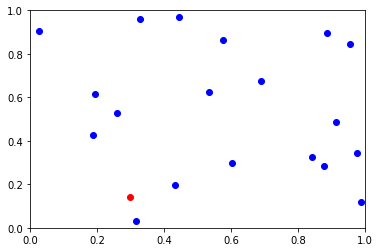

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Simulate a city space by selecting random values of the space coordinates.
number_cities = 20;
cities_x = np.random.random_sample((number_cities,))
cities_y = np.random.random_sample((number_cities,))

# Plotting cities
plt.plot(cities_x[0],cities_y[0],'ro')
plt.plot(cities_x[1:],cities_y[1:],'bo')
plt.axis([0.0,1.0,0.0,1.0])
plt.show()

In [61]:
import math
from collections import Counter
from collections import deque
import heapq

# Hyperparameters
population_size = 100  # This number will be kept constant over time. 
number_couples = 30 # How many couples will reproduce
mutation_rate = 2  # Two entries mutate
number_generations = 1000 # How many generations will the code run

###############################################
###############################################
###############################################
# Path class
# This class captures a choice of path connecting each of the cities.
class path():
  def __init__(self):
    pass
  def __lt__(self, other):
    return True

  def __le__(self,other):
    return True

  def generate_individual(self): # Generates a random path
    city_labels = np.arange(number_cities)[1:].tolist() 
    np.random.shuffle(city_labels)
    self.solution = [0]  # Starting city goes first
    for i in range(len(city_labels)):
      self.solution.append(city_labels[i])

  def generate_child(self,father, mother): # Generates the path out of two parents
    cut = np.random.randint(1,high = len(father.solution)-2,size=1)[0]
    father_A = father.solution[:cut]
    mother_B = mother.solution[cut:]
    father_B = father.solution[cut:]
    B_map = {mother_B[i]:father_B[i] for i in range(len(mother_B))}
    for i in range(len(father_A)):
      while father_A[i] in mother_B:
        father_A[i] = B_map[father_A[i]]
    self.solution = father_A+mother_B

  def validate(self): # Only used to debug. Uses a dictionary data structure to make sure each city is visited
    counter = Counter(self.solution)
    for i in range(number_cities):
      if counter[i] != 1:
        return False
    return True

  def plot_path(self): # Used to showcase the path. Plots it. 
    for i in range(number_cities):
      x_values = [ cities_x[self.solution[i]]  , cities_x[self.solution[(i+1) % number_cities]]  ]
      y_values = [ cities_y[self.solution[i]]  , cities_y[self.solution[(i+1) % number_cities]]  ]
      plt.plot(x_values,y_values,'g')

    plt.plot(cities_x[0],cities_y[0],'ro')
    plt.plot(cities_x[1:],cities_y[1:],'bo')
    plt.axis([0.0,1.0,0.0,1.0])
    plt.show()  

  def fitness(self): # Meassures path fitness by computing its length. This could be more efficient.
    f = 0
    for i in range(number_cities):
      f += math.sqrt( (cities_x[self.solution[(i+1) % number_cities]] - cities_x[self.solution[i]])**2    +  (cities_y[self.solution[(i+1) % number_cities]] - cities_y[self.solution[i]])**2 )
    return f
  
  def mutate(self,rate): # Implements a mutation. Will be used after child generation.
    for mutation_index in range(mutation_rate):
      index_1 = np.random.randint(0,high = len(self.solution)-1, size=1)[0]
      index_2 = np.random.randint(0,high = len(self.solution)-1, size=1)[0]
      self.solution[index_1], self.solution[index_2] = self.solution[index_2], self.solution[index_1] 

###############################################
###############################################
###############################################
def apply_generation(p): # Selects parents, produces children, and finally discriminates low fitness individuals

  child_heap = []
  for i in range(number_couples):
    child = path()
    father = heappop(p)
    mother = heappop(p)
    child.generate_child(father[1], mother[1])
    child.mutate(mutation_rate)
    heappush(child_heap,(child.fitness(),child))
    heappush(child_heap,father)
    heappush(child_heap,mother)

  # So far, the new child_heap contains only number_couples children. We now need to include the remainder of the population. 
  new_p = []
  while len(new_p)<population_size:
    if child_heap and child_heap[0][0] < p[0][0]: # Child is more fit:
      heappush(new_p,heappop(child_heap))
    else:
      heappush(new_p,heappop(p))
  return new_p

###############################################
###############################################
###############################################

def generate_population(): # Generates population
  aux_pop = []
  for i in range(population_size):
    aux_path = path()
    aux_path.generate_individual()
    aux_pop.append((aux_path.fitness(),aux_path))
  return aux_pop

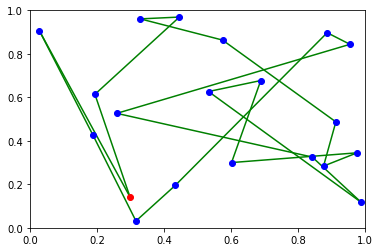

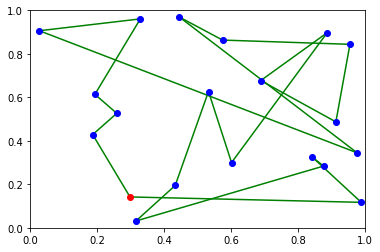

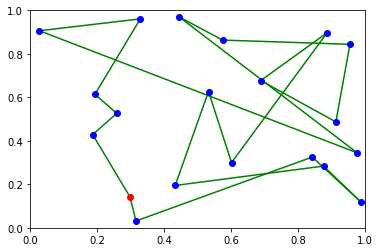

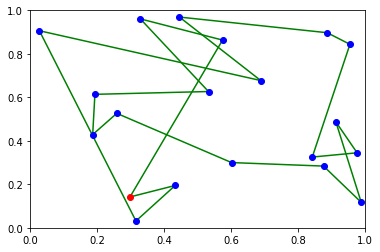

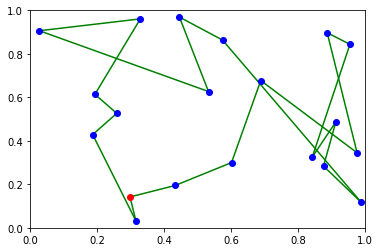

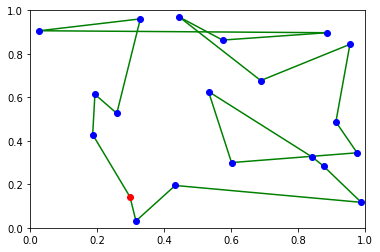

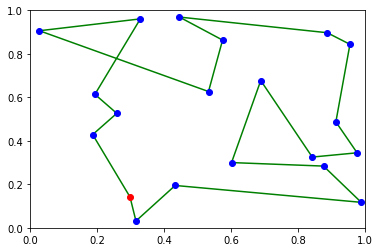

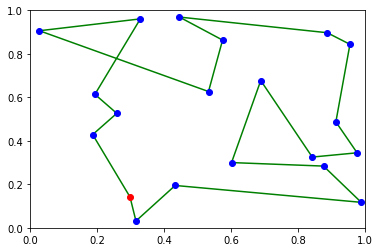

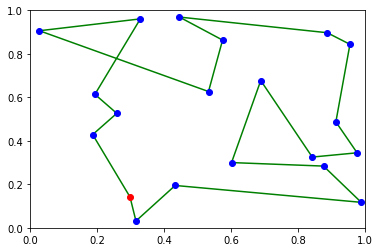

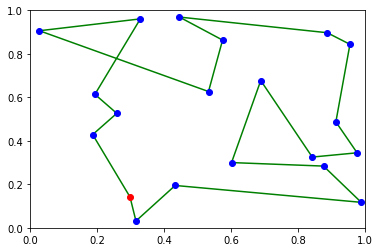

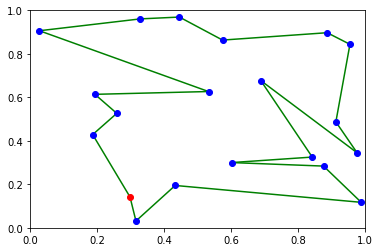

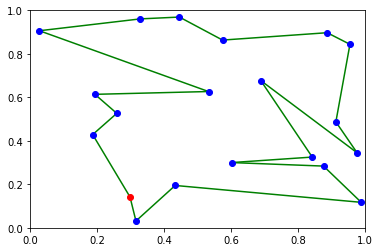

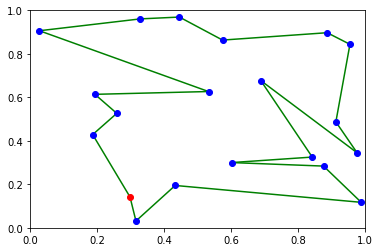

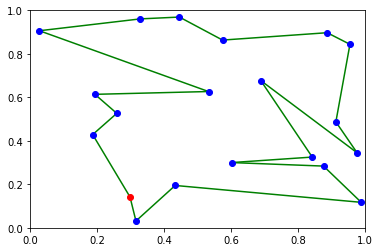

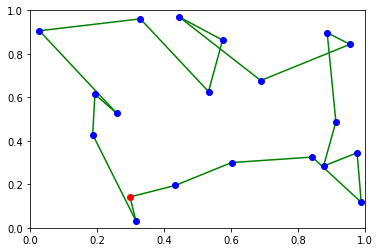

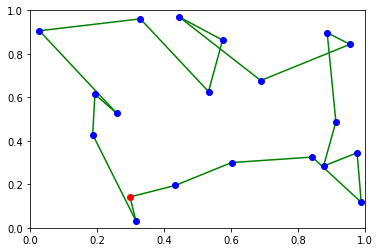

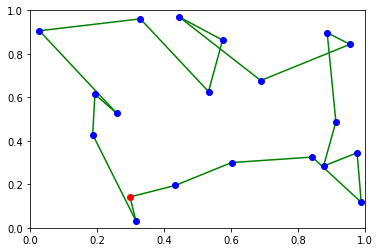

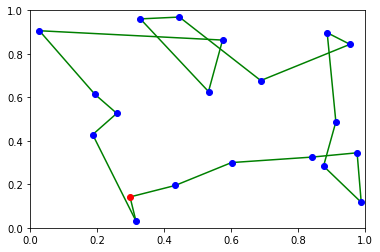

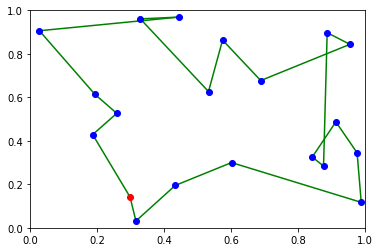

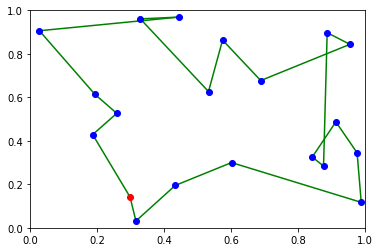

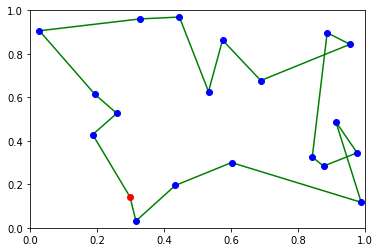

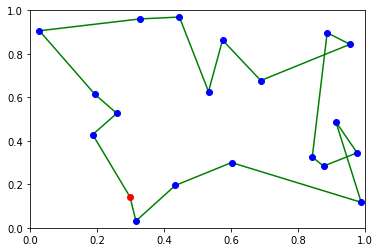

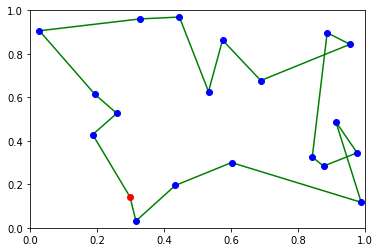

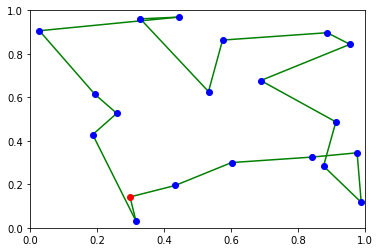

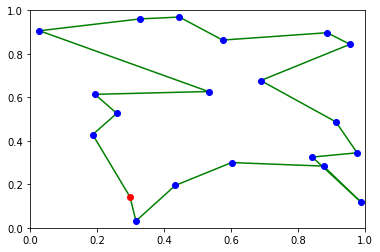

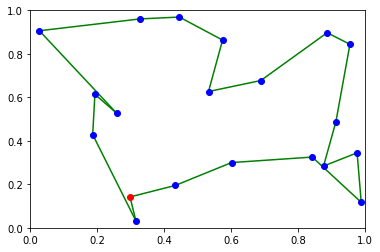

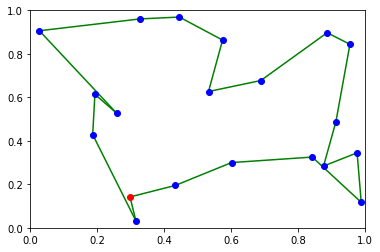

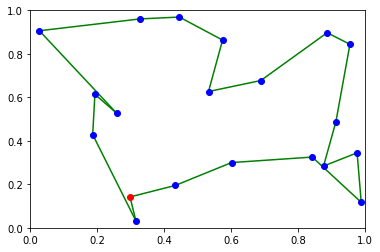

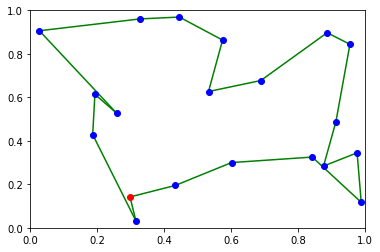

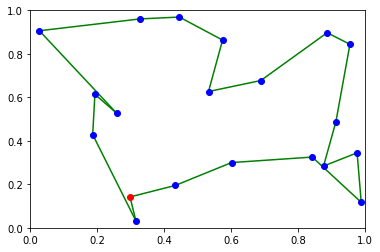

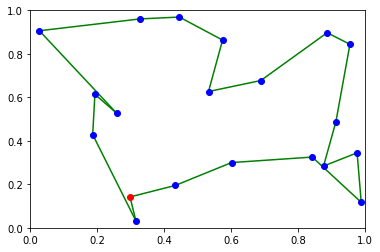

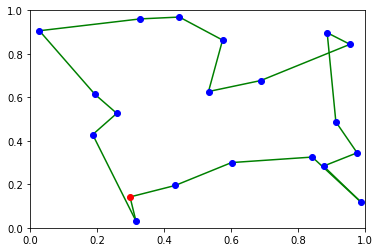

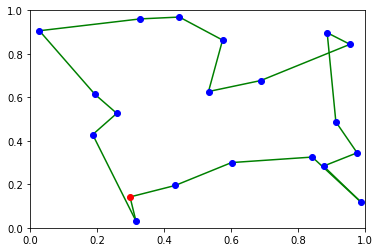

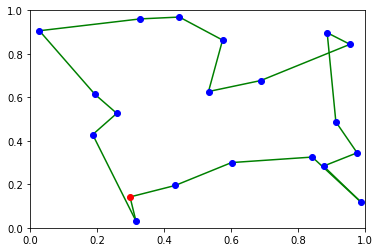

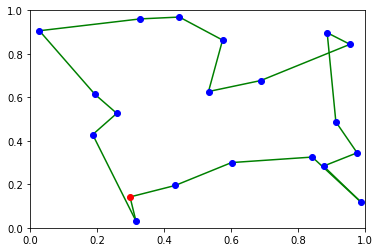

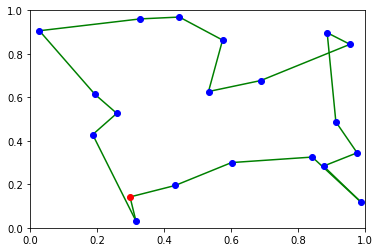

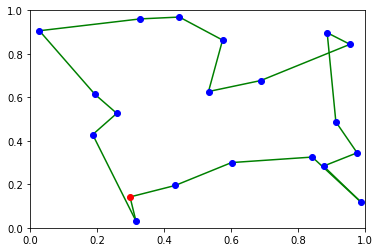

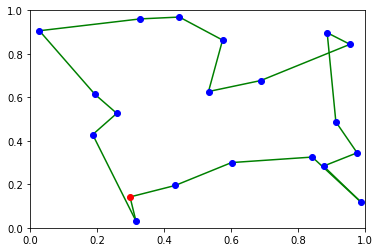

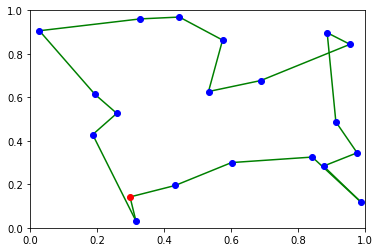

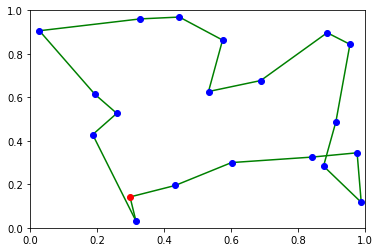

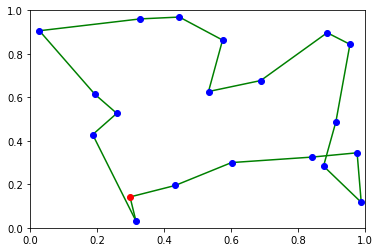

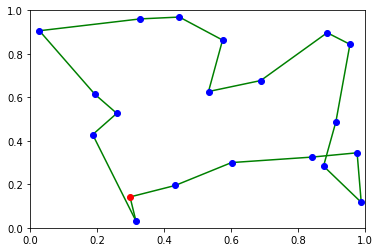

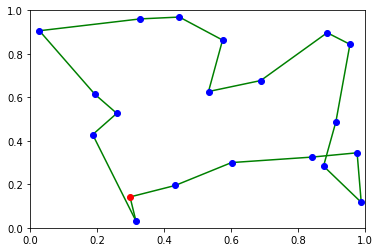

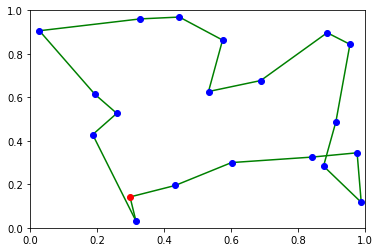

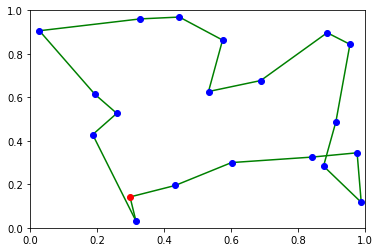

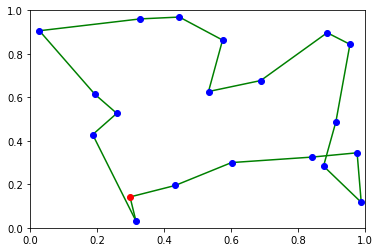

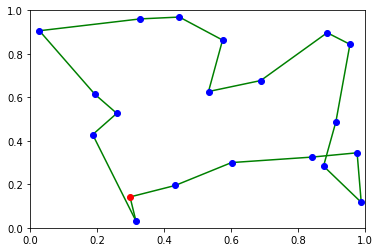

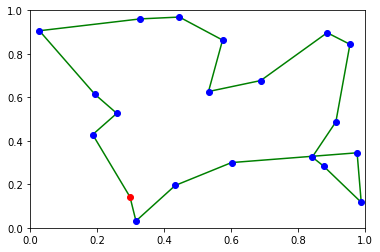

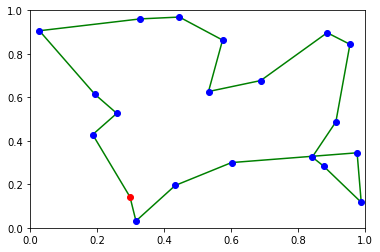

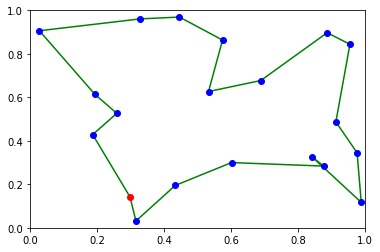

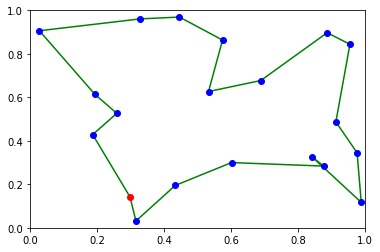

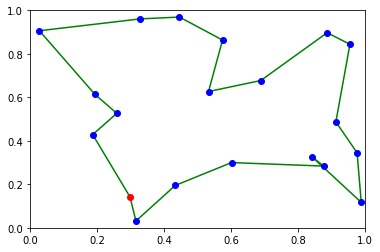

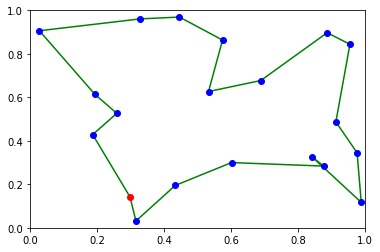

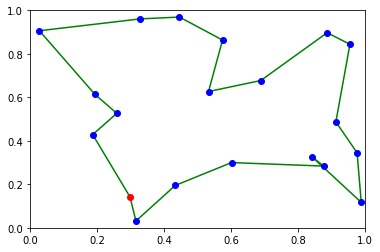

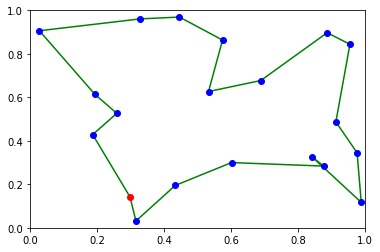

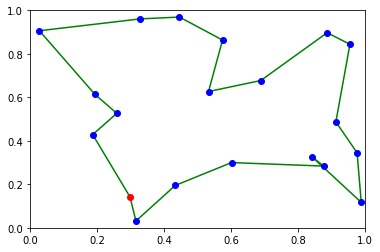

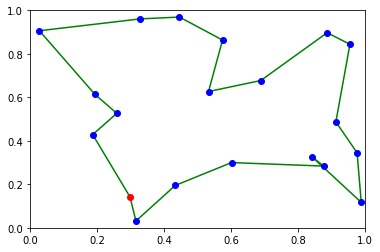

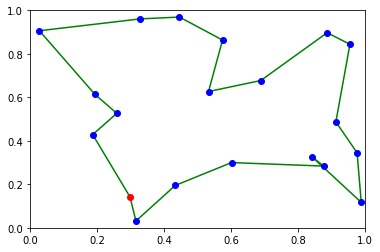

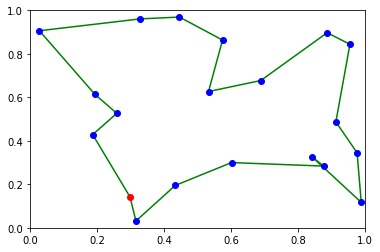

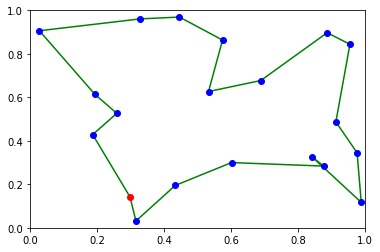

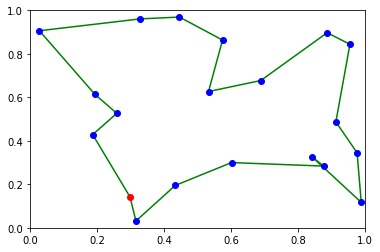

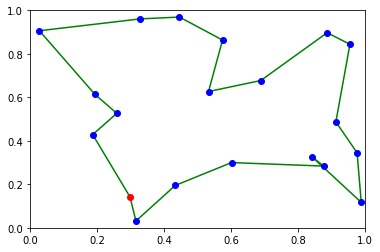

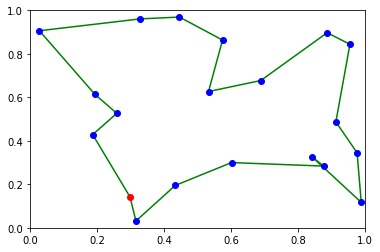

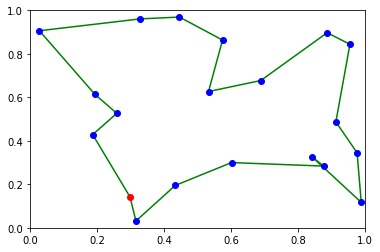

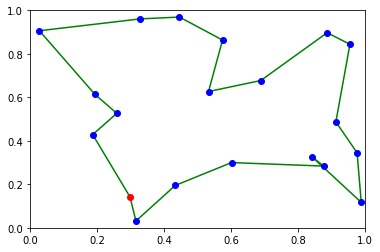

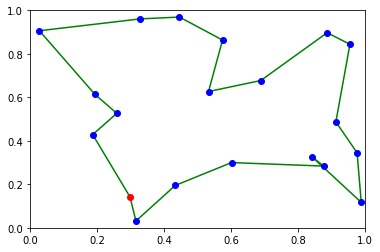

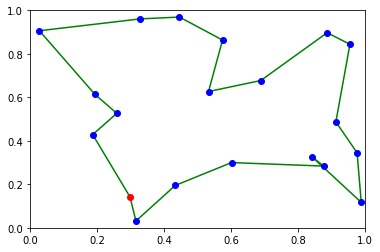

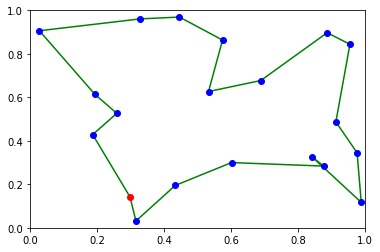

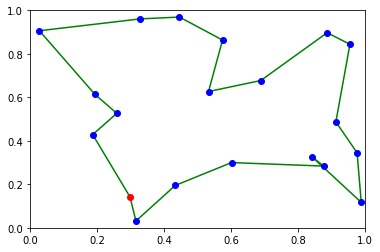

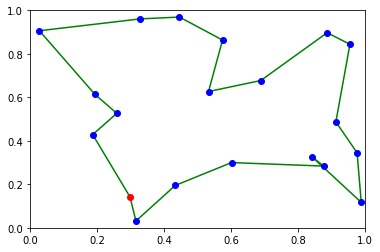

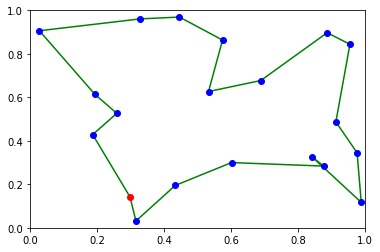

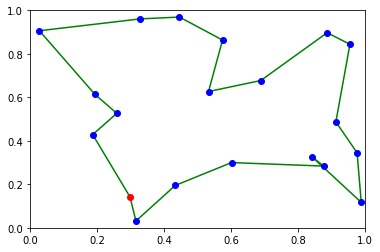

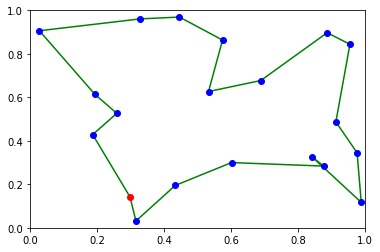

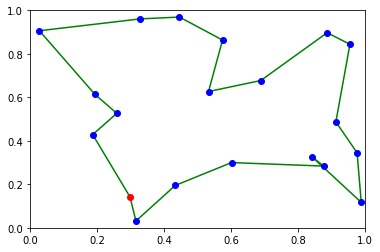

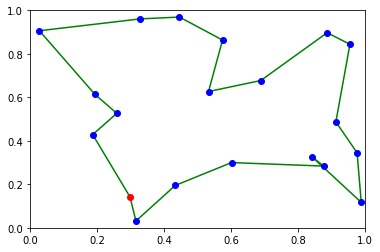

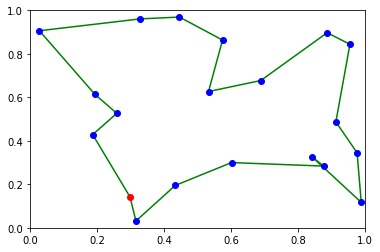

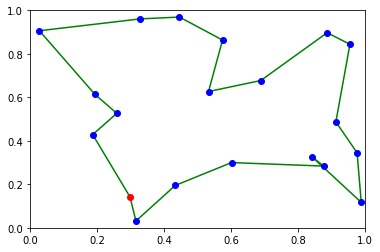

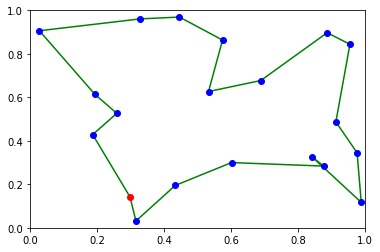

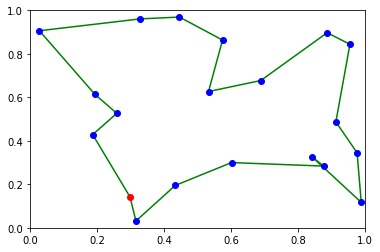

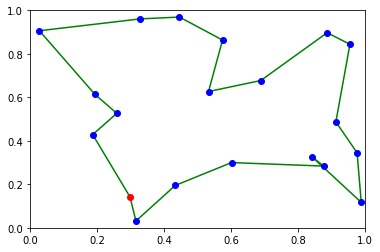

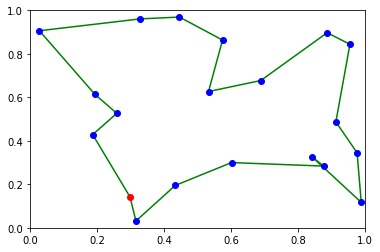

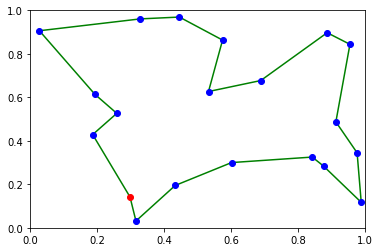

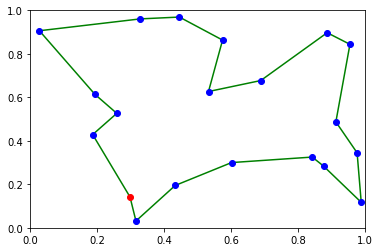

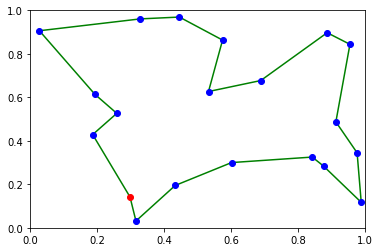

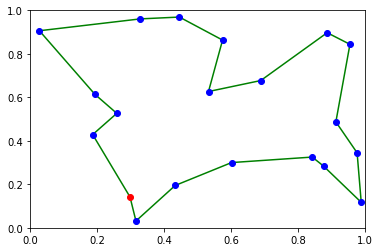

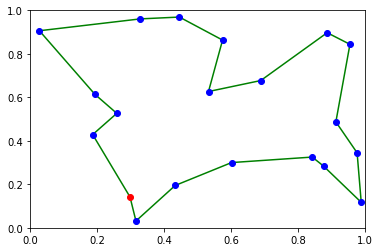

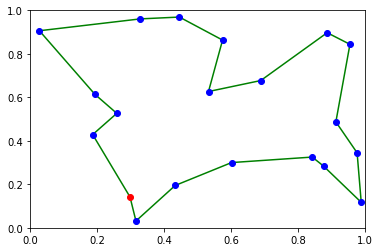

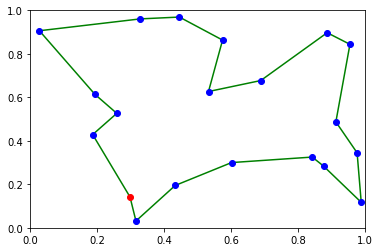

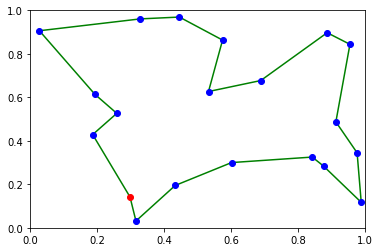

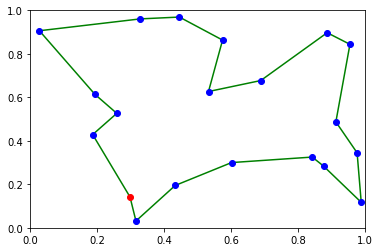

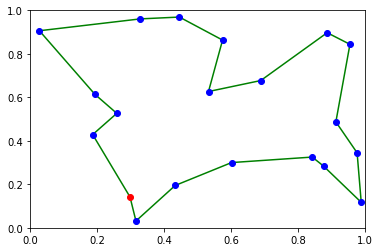

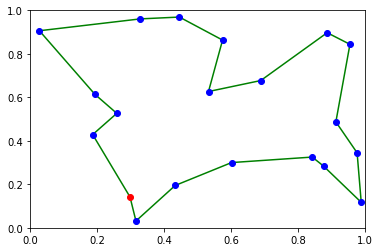

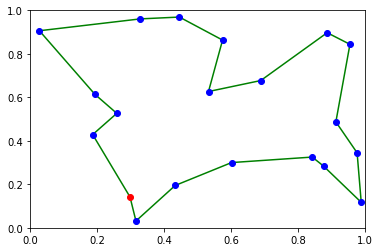

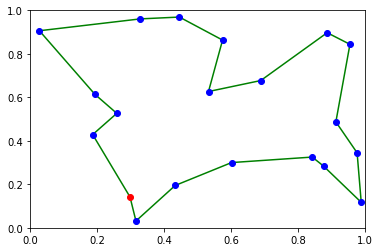

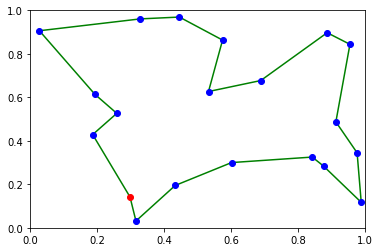

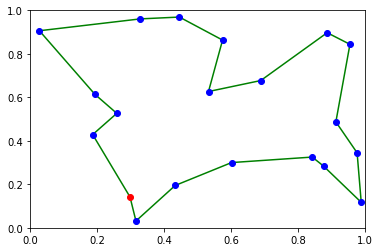

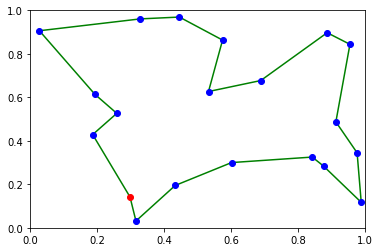

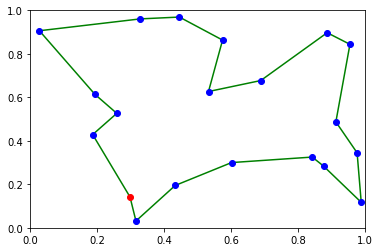

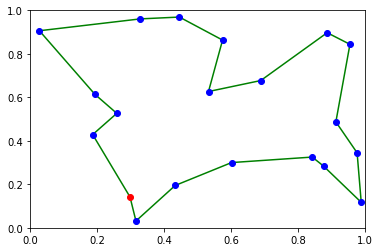

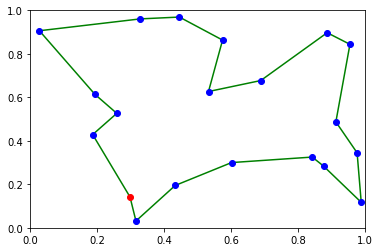

In [62]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from heapq import heappop, heappush

population = generate_population()
heapq.heapify(population)

for i in range(number_generations):
  population = apply_generation(population)
  if i%10 == 0:
    population[0][1].plot_path()